<a href="https://colab.research.google.com/github/tsaijoy/JoyTsai/blob/main/W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**我們來分析日本排球選手的各種得分數(攻擊攔網發球等等:D)**

In [69]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [83]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1MVKjpjnGR-N9RbR5xA_mXQUgDsYCcyMJY9FL8s7UYfk/edit?gid=1880837554#gid=1880837554')
# 選擇第一個工作表
worksheet = gsheets.get_worksheet(6)

In [84]:
# 取得所有數據
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])  # 第一行作為欄位名稱

# 去除可能的空格
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-84-5c1c2bc5f49b>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [85]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('volleyball').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,Player Name,Jersey No.,Serves,Successful Serves,Attacks,Successful Attacks,Attack Rate,Perfect Receptions,Reception Rate,Blocks,Successful Blocks,Total Points,Scoring Rate
0,Yūki Ishikawa,14,130,118,260,152,58.50%,95,76.00%,60,18,210,61.80%
1,Ran Takahashi,21,125,114,250,140,56.00%,88,74.60%,55,15,195,58.20%
2,Yuji Nishida,1,110,102,245,145,59.20%,65,71.40%,50,12,200,61.50%
3,Taishi Onodera,3,90,85,190,102,53.70%,58,69.90%,70,22,160,56.10%
4,Akihiro Yamauchi,12,95,87,210,115,54.80%,60,70.60%,75,25,170,57.60%


In [88]:
# 上傳 CSV 檔案
uploaded = files.upload()

Saving 程式語言 - volleyball.csv to 程式語言 - volleyball.csv


In [96]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# 假設檔案數據已經上傳
file_name = next(iter(uploaded.keys()))
data = pd.read_csv(file_name)

# 清理數據，確保關鍵欄位可用
data['Attack Rate'] = pd.to_numeric(data['Attack Rate'].str.rstrip('%'), errors='coerce')
data['Reception Rate'] = pd.to_numeric(data['Reception Rate'].str.rstrip('%'), errors='coerce')
data['Scoring Rate'] = pd.to_numeric(data['Scoring Rate'].str.rstrip('%'), errors='coerce')

# 攻擊表現分析：比較攻擊次數、成功攻擊次數、攻擊成功率
attack_fig = px.bar(
    data,
    x='Player Name',
    y=['Attacks', 'Successful Attacks'],
    text='Attack Rate',
    barmode='group',
    labels={'value': 'Number of Attacks', 'variable': 'Attack Type'},
    title="Attack Performance: Total Attacks vs Successful Attacks"
)
attack_fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# 攔網與得分分析：攔網成功次數與總得分
block_score_fig = px.scatter(
    data,
    x='Successful Blocks',
    y='Total Points',
    size='Total Points',
    color='Player Name',
    labels={'Successful Blocks': 'Successful Blocks', 'Total Points': 'Total Points'},
    title="Blocks vs Total Points"
)

# 接球成功率分析：完美接球與接球成功率
reception_fig = px.bar(
    data,
    x='Player Name',
    y=['Perfect Receptions', 'Reception Rate'],
    barmode='group',
    text='Reception Rate',
    labels={'value': 'Receptions/Rate', 'variable': 'Metric'},
    title="Reception Performance: Perfect Receptions vs Reception Rate"
)
reception_fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# 顯示圖表
attack_fig.show()
block_score_fig.show()
reception_fig.show()

# 將圖表保存為 HTML 檔案
attack_fig_html = pio.to_html(attack_fig)
block_score_fig_html = pio.to_html(block_score_fig)
reception_fig_html = pio.to_html(reception_fig)

with open("attack_performance.html", "w") as f:
    f.write(attack_fig_html)
with open("blocks_vs_points.html", "w") as f:
    f.write(block_score_fig_html)
with open("reception_performance.html", "w") as f:
    f.write(reception_fig_html)

print("圖表已保存為 HTML 文件！")

圖表已保存為 HTML 文件！


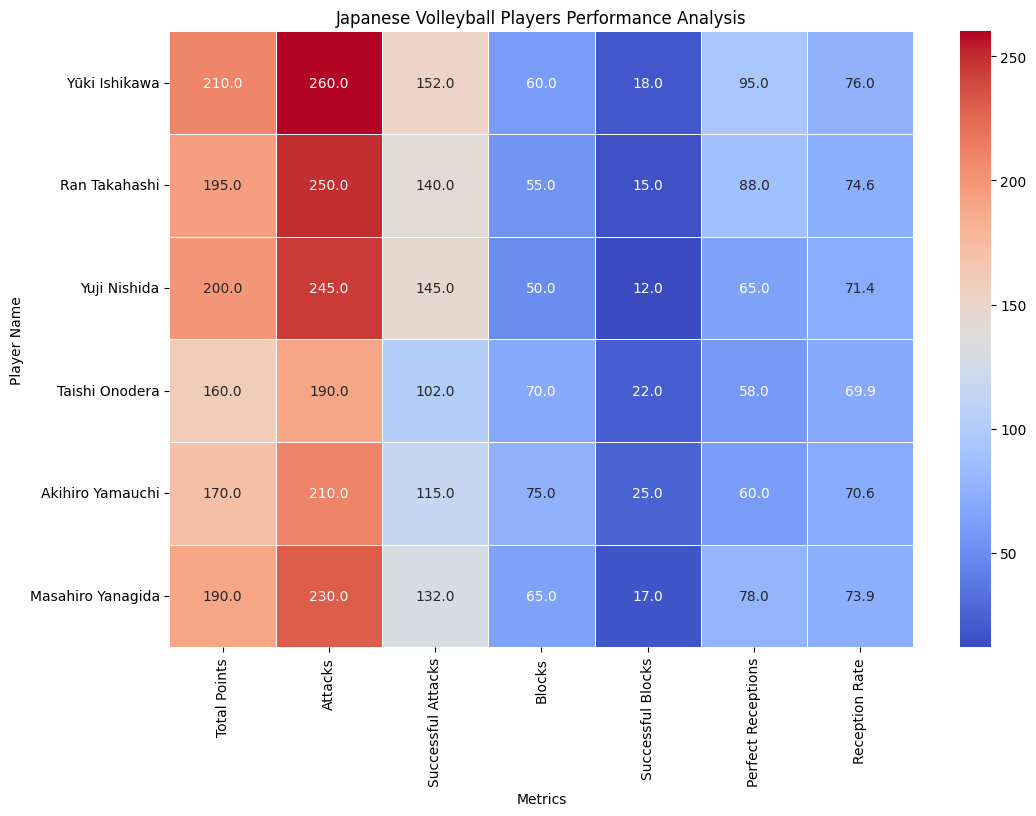

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取球員數據
data = pd.read_csv(file_name)

# 數據清理與轉換（移除百分比符號並轉換為數值型）
data['Attack Rate'] = pd.to_numeric(data['Attack Rate'].str.rstrip('%'), errors='coerce')
data['Reception Rate'] = pd.to_numeric(data['Reception Rate'].str.rstrip('%'), errors='coerce')
data['Scoring Rate'] = pd.to_numeric(data['Scoring Rate'].str.rstrip('%'), errors='coerce')

# 創建熱力圖所需的數據集
heatmap_data = data[['Player Name', 'Total Points', 'Attacks', 'Successful Attacks', 'Blocks', 'Successful Blocks', 'Perfect Receptions', 'Reception Rate']]

# 設置玩家名稱為索引，其他數據作為熱力圖的值
heatmap_data.set_index('Player Name', inplace=True)

# 繪製熱力圖
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Japanese Volleyball Players Performance Analysis")
plt.xlabel("Metrics")
plt.ylabel("Player Name")
plt.show()